# Results in Taylor diagram
- This script is used to visualize the results in taylor diagrams over site;
- Simulations: CNTL, WRF_LCZ, LI_LCZ;

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import cftime
# pip install geocat.viz
import geocat.viz as gv
import string

In [3]:
home_path = '/gws/nopw/j04/duicv/yuansun/'
output_dir = home_path + '0_lcz_sp/output_analysis/sp/taylor_assess/'
truedata = pd.read_csv(output_dir + 'results4taylor.csv')
truedata

,Variable,Model,sdev,coef,site
0,Rn,S-CNTL,0.921904,0.998689,AU-Preston
1,Rn,S-WRF_LCZ,0.968726,0.998857,AU-Preston
2,Rn,S-LI_LCZ,0.962951,0.998870,AU-Preston
3,SWup,S-CNTL,1.012184,0.996702,AU-Preston
4,SWup,S-WRF_LCZ,1.012184,0.996702,AU-Preston
...,...,...,...,...,...
346,Qle,S-WRF_LCZ,0.637185,0.332569,US-WestPhoenix
347,Qle,S-LI_LCZ,0.635664,0.332784,US-WestPhoenix
348,Qtau,S-CNTL,0.714845,0.837144,US-WestPhoenix
349,Qtau,S-WRF_LCZ,0.710798,0.833920,US-WestPhoenix


In [4]:
# a complete dataframe should be 6*3*21 = 378
# 6 variables: Rn, SWup, LWup, Qh, Qle, Qtau
# 3 models
# 21 sites
# add dummy variables
new_rows = pd.DataFrame([
                    {'Variable': 'LWup', 'Model': 'S-CNTL', 'sdev': 2, 'coef': 0,  'site':'MX-Escandon'},
                    {'Variable': 'LWup', 'Model': 'S-WRF_LCZ', 'sdev': 2, 'coef': 0,  'site':'MX-Escandon'},
                    {'Variable': 'LWup', 'Model': 'S-LI_LCZ', 'sdev': 2, 'coef': 0,  'site':'MX-Escandon'}, 
                    {'Variable': 'Qtau', 'Model': 'S-CNTL', 'sdev': 2, 'coef': 0,  'site':'FI-Kumpula'},
                    {'Variable': 'Qtau', 'Model': 'S-WRF_LCZ', 'sdev': 2, 'coef': 0,  'site':'FI-Kumpula'},
                    {'Variable': 'Qtau', 'Model': 'S-LI_LCZ', 'sdev': 2, 'coef': 0,  'site':'FI-Kumpula'},
                    {'Variable': 'Qtau', 'Model': 'S-CNTL', 'sdev': 2, 'coef': 0,  'site':'FI-Torni'},
                    {'Variable': 'Qtau', 'Model': 'S-WRF_LCZ', 'sdev': 2, 'coef': 0,  'site':'FI-Torni'},
                    {'Variable': 'Qtau', 'Model': 'S-LI_LCZ', 'sdev': 2, 'coef': 0,  'site':'FI-Torni'},
                    {'Variable': 'Qtau', 'Model': 'S-CNTL', 'sdev': 2, 'coef': 0,  'site':'JP-Yoyogi'},
                    {'Variable': 'Qtau', 'Model': 'S-WRF_LCZ', 'sdev': 2, 'coef': 0,  'site':'JP-Yoyogi'},
                    {'Variable': 'Qtau', 'Model': 'S-LI_LCZ', 'sdev': 2, 'coef': 0,  'site':'JP-Yoyogi'},
                    {'Variable': 'Qtau', 'Model': 'S-CNTL', 'sdev': 2, 'coef': 0,  'site':'KR-Jungnang'},
                    {'Variable': 'Qtau', 'Model': 'S-WRF_LCZ', 'sdev': 2, 'coef': 0,  'site':'KR-Jungnang'},
                    {'Variable': 'Qtau', 'Model': 'S-LI_LCZ', 'sdev': 2, 'coef': 0,  'site':'KR-Jungnang'},
                    {'Variable': 'Qtau', 'Model': 'S-CNTL', 'sdev': 2, 'coef': 0,  'site':'KR-Ochang'},
                    {'Variable': 'Qtau', 'Model': 'S-WRF_LCZ', 'sdev': 2, 'coef': 0,  'site':'KR-Ochang'},
                    {'Variable': 'Qtau', 'Model': 'S-LI_LCZ', 'sdev': 2, 'coef': 0,  'site':'KR-Ochang'},
                    {'Variable': 'Qtau', 'Model': 'S-CNTL', 'sdev': 2, 'coef': 0,  'site':'PL-Lipowa'},
                    {'Variable': 'Qtau', 'Model': 'S-WRF_LCZ', 'sdev': 2, 'coef': 0,  'site':'PL-Lipowa'},
                    {'Variable': 'Qtau', 'Model': 'S-LI_LCZ', 'sdev': 2, 'coef': 0,  'site':'PL-Lipowa'},
                    {'Variable': 'Qtau', 'Model': 'S-CNTL', 'sdev': 2, 'coef': 0,  'site':'PL-Narutowicza'},
                    {'Variable': 'Qtau', 'Model': 'S-WRF_LCZ', 'sdev': 2, 'coef': 0,  'site':'PL-Narutowicza'},
                    {'Variable': 'Qtau', 'Model': 'S-LI_LCZ', 'sdev': 2, 'coef': 0,  'site':'PL-Narutowicza'},
                    {'Variable': 'Qtau', 'Model': 'S-CNTL', 'sdev': 2, 'coef': 0,  'site':'SG-TelokKurau06'},
                    {'Variable': 'Qtau', 'Model': 'S-WRF_LCZ', 'sdev': 2, 'coef': 0,  'site':'SG-TelokKurau06'},
                    {'Variable': 'Qtau', 'Model': 'S-LI_LCZ', 'sdev': 2, 'coef': 0,  'site':'SG-TelokKurau06'}])
data = pd.concat([truedata,new_rows], ignore_index=True)

In [5]:
data.loc[(data['Variable'] == 'Rn') & (data['sdev'].isna()), 'sdev'] = 2
data.loc[(data['Variable'] == 'Rn') & (data['sdev'].isna()), 'coef'] = 0

In [6]:
data.site.unique()

array(['AU-Preston', 'AU-SurreyHills', 'CA-Sunset', 'FI-Kumpula',
       'FI-Torni', 'FR-Capitole', 'GR-HECKOR', 'JP-Yoyogi', 'KR-Jungnang',
       'KR-Ochang', 'MX-Escandon', 'NL-Amsterdam', 'PL-Lipowa',
       'PL-Narutowicza', 'SG-TelokKurau06', 'UK-KingsCollege',
       'UK-Swindon', 'US-Baltimore', 'US-Minneapolis1', 'US-Minneapolis2',
       'US-WestPhoenix'], dtype=object)

In [7]:
labelfont = 14
markersize= 30
linewidth = 1
labelcolor = '#6b6b6b'
padding = 8
pad = 1
xwidth = 1
length = 1

# Create a list of model names
namearr = data.site.unique()
nModel = len(namearr)

# Create a list of case names
casearr = ["Default", "WRF-LCZ", "LI-LCZ"]
nCase = len(casearr)
lc0 = '#083550'
#lc1 = '#006bac'
lc1 = labelcolor
lc2 = '#3da4e3'
lc3 = '#6c64d4'
lc4 = '#1a8865'
lc5 = '#cb682c'
lc = [lc0, lc1, lc4, lc5]
colors = [lc1, lc4, lc5]
colors2 = [lc5, lc4, lc1]
#labels = ['S-CNTL', 'S-WRF_LCZ', 'S-LI_LCZ']
labels = ['CNTL', 'WRF_LCZ', 'LI_LCZ']
maintitles = ['Rn', 'SWup', 'LWup', 'Qh', 'Qle', 'Qtau']
maintitles2 = ['$R_{n}$', '$SW_{up}$', '$LW_{up}$', '$Q_{h}$', '$Q_{le}$', '$Q_{tau}$']
std_range_list = [(0, 1.25), 
                  (0, 1.25),
                  (0, 1.5),
                  (0, 1.5),
                  (0, 1.5),
                  (0, 1)]
alpha = 0.5

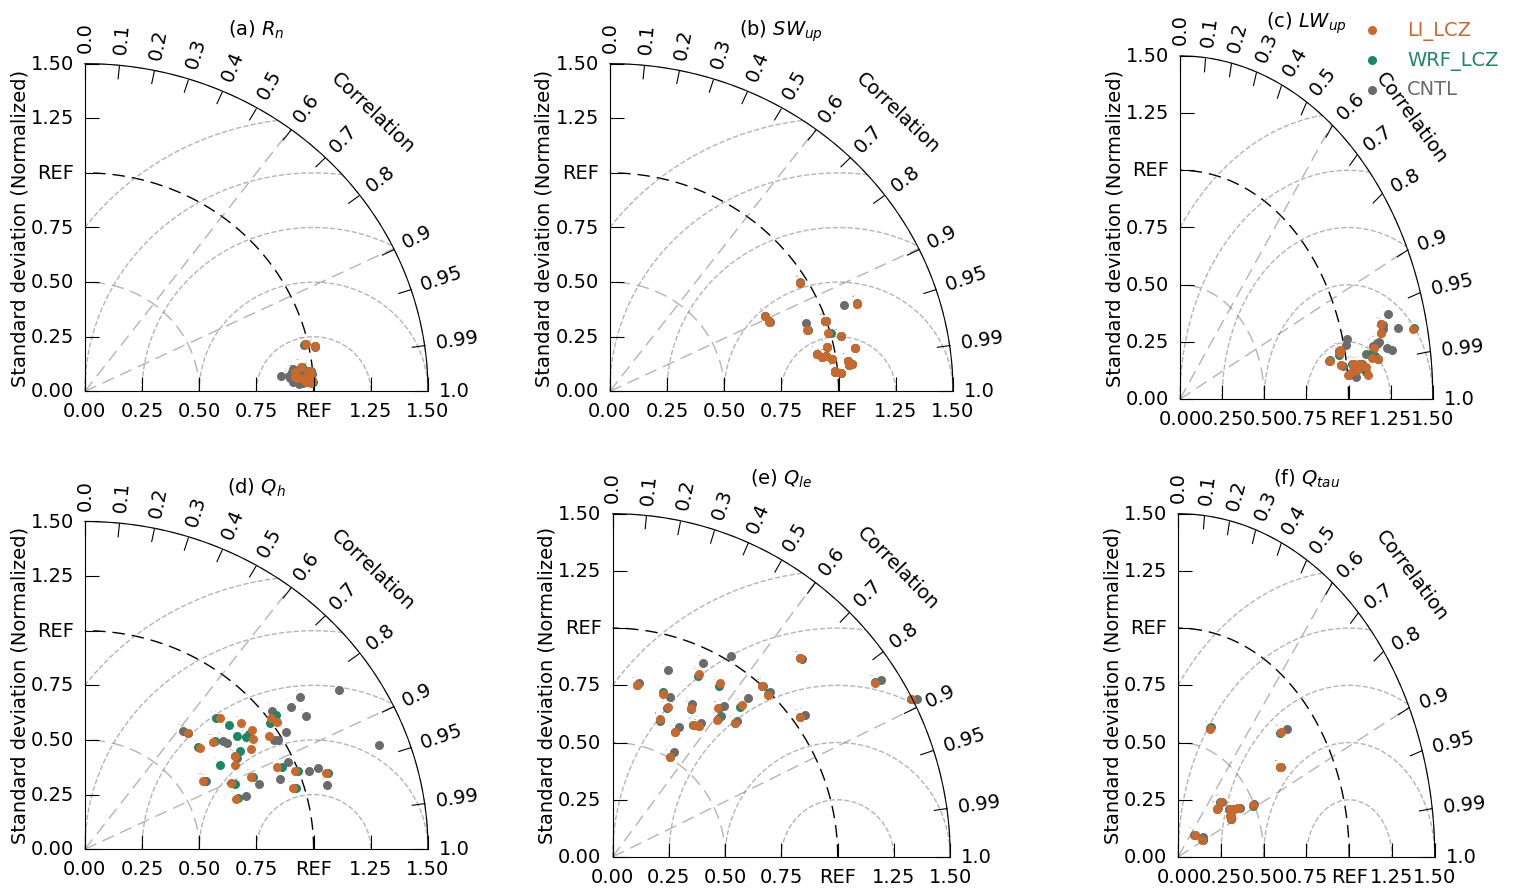

In [9]:
fig = plt.figure(figsize=(16, 9))
for i in range(6):
    data_sel = data[data['Variable'] == maintitles[i]]
    #data_sel['Variable'] = pd.Categorical(data_sel['Variable'], categories=maintitles, ordered=True)
    data_sel.loc[:, 'Variable'] = pd.Categorical(data_sel['Variable'], categories=maintitles, ordered=True)
    std_pivot_df = data_sel.pivot(index='Model', columns='site', values='sdev')
    cof_pivot_df = data_sel.pivot(index='Model', columns='site', values='coef')
    # bias_pivot_df = data_sel.pivot(index='Model', columns='site', values='bias')
    stddev = std_pivot_df.to_numpy()
    corrcoef = cof_pivot_df.to_numpy()
    # bias = bias_pivot_df.to_numpy()
    # stddev = np.random.normal(1, 0.25, (nCase, nModel))
    # corrcoef = np.random.uniform(0.7, 1, (nCase, nModel))

    # Create taylor diagram
    da = gv.TaylorDiagram(refstd=1, fig=fig, rect=231 + i, label='REF', std_range=(0, 1.5))

    # Add models case by case
    for j in range(stddev.shape[0]): # stddev.shape[0] is 3, stddev.shape[1] is 21
        if j == 0:
            da.add_model_set(stddev[j],
                         corrcoef[j],
                         #xytext=(-12.5, 30), # marker label location, in pixels
                         #fontsize=labelfont -2,
                         fontsize=0,
                         color=colors[j],
                         label=labels[j],
                         marker='o', 
                         #facecolors='none',
                         facecolors=colors[j],
                         s=markersize)
        else:
            da.add_model_set(stddev[j],
                         corrcoef[j],
                         fontsize=0,
                         color=colors[j],
                         label=labels[j],
                         marker='o', 
                         #facecolors='none',
                         facecolors=colors[j],
                         s=markersize)

    # Add title
    list = f"({chr(97 + i)})" 
    da.add_title(list + ' ' + maintitles2[i], y_loc = 1.05, fontsize=labelfont)
    # Set axis fontsize and pad
    da.set_fontsizes_and_pad(ticklabel_fontsize = labelfont, axislabel_fontsize=labelfont, axislabel_pad = 1)
    # Add legend
    if i== 5:
        # 3 models legend
        legend2 = da.add_legend(1.3, 2.45, fontsize=labelfont, **{'label':['S-CNTL', 'S-WRF_LCZ', 'S-LI_LCZ'], 
                                                                  'reverse': True,
                                                                  #'handletextpad': 1
                                                                  })
        for i, text in enumerate(legend2.get_texts()):
            text.set_color(colors2[i])
        
        # 21 sites legend
        #da.add_model_name(namearr, x_loc = 1.2, y_loc = 1.2, fontsize=labelfont-1,**{'color':labelcolor})
        
    
    # Add standard deviation axis grid
    da.add_std_grid(np.array([0.5, 1.5]), color=labelcolor, linewidth=xwidth, alpha = alpha)
    # Add correlation axis grid
    da.add_corr_grid(np.array([0.6, 0.9]), color=labelcolor,linewidth=xwidth, alpha = alpha)
    # Add RMS contours, and label them
    da.add_contours(levels=np.arange(0, 1.5, 0.25), colors=labelcolor, linewidths=xwidth, alpha = alpha, **{'linestyles': '--'})   
    
    #da.set_fontsizes_and_pad(ticklabel_fontsize=labelfont, axislabel_fontsize=labelfont, axislabel_pad=pad)
    
fig.subplots_adjust(left=0.05, right=0.925, bottom=0.05, top=0.95,wspace=0.5, hspace=0.3)
    
fig.savefig(output_dir + 'taylor.png', dpi=300)
fig.savefig(output_dir + 'taylor.pdf', dpi=600)

# Result description

## Normalized standard deviation

In [24]:
swup = truedata[truedata['Variable']=='SWup']
# describe normalizaed standard deviation of SWup
swup_cntl = swup[swup['Model']=='S-CNTL']
swup_wrf = swup[swup['Model']=='S-WRF_LCZ']
swup_li = swup[swup['Model']=='S-LI_LCZ']
var = 'sdev'
print(round(swup_cntl[var].mean(),1), round(swup_wrf[var].mean(),1), round(swup_li[var].mean(),1))
print(round(swup_cntl[var].std(),1), round(swup_wrf[var].std(),1), round(swup_li[var].std(),1))

1.0 1.0 1.0
0.1 0.1 0.1


In [25]:
# describe normalizaed standard deviation of LWup
lwup = truedata[truedata['Variable']=='LWup']
lwup_cntl = lwup[lwup['Model']=='S-CNTL']
lwup_wrf = lwup[lwup['Model']=='S-WRF_LCZ']
lwup_li = lwup[lwup['Model']=='S-LI_LCZ']
var = 'sdev'
print(round(lwup_cntl[var].mean(),1), round(lwup_wrf[var].mean(),1), round(lwup_li[var].mean(),1))
print(round(lwup_cntl[var].std(),1), round(lwup_wrf[var].std(),1), round(lwup_li[var].std(),1))

1.2 1.1 1.1
0.3 0.2 0.2


In [26]:
# the maximum value of normalized standard deviation of LWup
var = 'sdev'
max_index = lwup_cntl[var].idxmax()
max_row = lwup_cntl.loc[max_index]
print(max_row)
max_index = lwup_wrf[var].idxmax()
max_row = lwup_wrf.loc[max_index]
print(max_row)
max_index = lwup_li[var].idxmax()
max_row = lwup_li.loc[max_index]
print(max_row)

Variable               LWup
Model                S-CNTL
sdev               2.030336
coef               0.977198
site        SG-TelokKurau06
Name: 234, dtype: object
Variable               LWup
Model             S-WRF_LCZ
sdev                1.63711
coef               0.981955
site        SG-TelokKurau06
Name: 235, dtype: object
Variable               LWup
Model              S-LI_LCZ
sdev               1.660774
coef               0.982267
site        SG-TelokKurau06
Name: 236, dtype: object


In [27]:
# describe normalizaed standard deviation of Qh
qh = truedata[truedata['Variable']=='Qh']
qh_cntl = qh[qh['Model']=='S-CNTL']
qh_wrf = qh[qh['Model']=='S-WRF_LCZ']
qh_li = qh[qh['Model']=='S-LI_LCZ']
var = 'sdev'
print(round(qh_cntl[var].mean(),1), round(qh_wrf[var].mean(),1), round(qh_li[var].mean(),1))
print(round(qh_cntl[var].std(),1), round(qh_wrf[var].std(),1), round(qh_li[var].std(),1))

1.0 0.8 0.8
0.2 0.1 0.1


In [28]:
# the maximum value of normalized standard deviation of Qh
var = 'sdev'
max_index = qh_cntl[var].idxmax()
max_row = qh_cntl.loc[max_index]
print(max_row)
max_index = qh_wrf[var].idxmax()
max_row = qh_wrf.loc[max_index]
print(max_row)
max_index = qh_li[var].idxmax()
max_row = qh_li.loc[max_index]
print(max_row)

Variable           Qh
Model          S-CNTL
sdev         1.370114
coef         0.937159
site        GR-HECKOR
Name: 111, dtype: object
Variable           Qh
Model       S-WRF_LCZ
sdev         1.110591
coef         0.950115
site        GR-HECKOR
Name: 112, dtype: object
Variable           Qh
Model        S-LI_LCZ
sdev         1.118548
coef         0.950181
site        GR-HECKOR
Name: 113, dtype: object


In [30]:
# describe normalizaed standard deviation of Qle
qle = truedata[truedata['Variable']=='Qle']
qle_cntl = qle[qle['Model']=='S-CNTL']
qle_wrf = qle[qle['Model']=='S-WRF_LCZ']
qle_li = qle[qle['Model']=='S-LI_LCZ']
var = 'sdev' 
print(round(qle_cntl[var].mean(),1), round(qle_wrf[var].mean(),1), round(qle_li[var].mean(),1))
print(round(qle_cntl[var].std(),1), round(qle_wrf[var].std(),1), round(qle_li[var].std(),1))

0.9 0.9 0.9
0.3 0.3 0.3


In [32]:
# describe normalizaed standard deviation of Qtau
qtau = truedata[truedata['Variable']=='Qtau']
qtau_cntl = qtau[qtau['Model']=='S-CNTL']
qtau_wrf = qtau[qtau['Model']=='S-WRF_LCZ']
qtau_li = qtau[qtau['Model']=='S-LI_LCZ']
var = 'sdev' 
print(round(qtau_cntl[var].mean(),1), round(qtau_wrf[var].mean(),1), round(qtau_li[var].mean(),1))
print(round(qtau_cntl[var].std(),1), round(qtau_wrf[var].std(),1), round(qtau_li[var].std(),1))

0.4 0.4 0.4
0.2 0.2 0.2


## correlation coefficient

In [34]:
# describe correlation coefficient of SWup
var = 'coef'
print(round(swup_cntl[var].mean(),2), round(swup_wrf[var].mean(),2), round(swup_li[var].mean(),2))
print(round(swup_cntl[var].std(),1), round(swup_wrf[var].std(),1), round(swup_li[var].std(),1))

0.96 0.96 0.96
0.0 0.0 0.0


In [35]:
# describe correlation coefficient of LWup
var = 'coef'
print(round(lwup_cntl[var].mean(),2), round(lwup_wrf[var].mean(),2), round(lwup_li[var].mean(),2))
print(round(lwup_cntl[var].std(),1), round(lwup_wrf[var].std(),1), round(lwup_li[var].std(),1))

0.98 0.99 0.99
0.0 0.0 0.0


In [39]:
# describe correlation coefficient of Qh
var = 'coef'
print(round(qh_cntl[var].mean(),1), round(qh_wrf[var].mean(),1), round(qh_li[var].mean(),1))
print(round(qh_cntl[var].std(),2), round(qh_wrf[var].std(),2), round(qh_li[var].std(),2))

0.9 0.8 0.8
0.08 0.08 0.09


In [38]:
# describe the minimum value of correlation coefficient of Qh
var = 'coef'
min_index = qh_cntl[var].idxmin()
min_row = qh_cntl.loc[min_index]
print(min_row)
min_index = qh_wrf[var].idxmin()
min_row = qh_wrf.loc[min_index]
print(min_row)
min_index = qh_li[var].idxmin()
min_row = qh_li.loc[min_index]
print(min_row)

Variable                 Qh
Model                S-CNTL
sdev               0.690069
coef                0.62172
site        US-Minneapolis2
Name: 324, dtype: object
Variable                 Qh
Model             S-WRF_LCZ
sdev                0.69871
coef               0.646673
site        US-Minneapolis2
Name: 325, dtype: object
Variable                 Qh
Model              S-LI_LCZ
sdev               0.698329
coef               0.647195
site        US-Minneapolis2
Name: 326, dtype: object


In [31]:
var = 'coef' 
print(qle_cntl[var].mean(), qle_wrf[var].mean(), qle_li[var].mean())
print(qle_cntl[var].std(), qle_wrf[var].std(), qle_li[var].std())

0.5589389306045567 0.5586573094166154 0.5571646563562948
0.18797983105895638 0.186946775448133 0.187546353656218


In [40]:
# describe the minimum value of correlation coefficient of Qle
var = 'coef' 
min_index = qle_cntl[var].idxmin()
min_row = qle_cntl.loc[min_index]
print(min_row)
min_index = qle_wrf[var].idxmin()
min_row = qle_wrf.loc[min_index]
print(min_row)
min_index = qle_li[var].idxmin()
min_row = qle_li.loc[min_index]
print(min_row)

Variable          Qle
Model          S-CNTL
sdev         0.767731
coef         0.153076
site        GR-HECKOR
Name: 114, dtype: object
Variable          Qle
Model       S-WRF_LCZ
sdev         0.759633
coef         0.144012
site        GR-HECKOR
Name: 115, dtype: object
Variable          Qle
Model        S-LI_LCZ
sdev         0.760234
coef         0.144231
site        GR-HECKOR
Name: 116, dtype: object


## Centred-root-mean square difference (E')

In [41]:
#rms = observed_std * np.sqrt(1 + nsd**2 - 2 * nsd * correlation_coefficient)
#rms = np.sqrt(std1**2 + std2**2 - 2 * std1 * std2 * corr_coeff)
truedata['rms'] = np.sqrt(1 + truedata['sdev']**2 - 2 * truedata['sdev'] * truedata['coef'])
truedata

,Variable,Model,sdev,coef,site,rms
0,Rn,S-CNTL,0.921904,0.998689,AU-Preston,0.092279
1,Rn,S-WRF_LCZ,0.968726,0.998857,AU-Preston,0.056511
2,Rn,S-LI_LCZ,0.962951,0.998870,AU-Preston,0.059575
3,SWup,S-CNTL,1.012184,0.996702,AU-Preston,0.082618
4,SWup,S-WRF_LCZ,1.012184,0.996702,AU-Preston,0.082618
...,...,...,...,...,...,...
346,Qle,S-WRF_LCZ,0.637185,0.332569,US-WestPhoenix,0.991055
347,Qle,S-LI_LCZ,0.635664,0.332784,US-WestPhoenix,0.990450
348,Qtau,S-CNTL,0.714845,0.837144,US-WestPhoenix,0.560488
349,Qtau,S-WRF_LCZ,0.710798,0.833920,US-WestPhoenix,0.565453


In [42]:
truedata[truedata['rms']>1]

,Variable,Model,sdev,coef,site,rms
114,Qle,S-CNTL,0.767731,0.153076,GR-HECKOR,1.163774
115,Qle,S-WRF_LCZ,0.759633,0.144012,GR-HECKOR,1.165440
116,Qle,S-LI_LCZ,0.760234,0.144231,GR-HECKOR,1.165614
147,Qle,S-CNTL,0.745471,0.341804,KR-Jungnang,1.022799
148,Qle,S-WRF_LCZ,0.700472,0.348200,KR-Jungnang,1.001426
174,Qle,S-CNTL,0.852352,0.288453,MX-Escandon,1.111205
175,Qle,S-WRF_LCZ,0.747452,0.296432,MX-Escandon,1.056195
176,Qle,S-LI_LCZ,0.752597,0.296704,MX-Escandon,1.058208
234,LWup,S-CNTL,2.030336,0.977198,SG-TelokKurau06,1.074330
255,Qle,S-CNTL,0.938339,0.425991,UK-KingsCollege,1.039727
